## Titanic EDA
박지훈

### 패키지 로드

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### 데이터 로드

In [2]:
test = pd.read_csv("./data/test.csv")
train = pd.read_csv("./data/train.csv")

In [39]:
with open("./data/test.csv") as f:
    a = f.readlines()
    
with open("./data/train.csv") as f:
    b = f.readlines()

In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary

|Variable|Definition|Key|
|--------|----------|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex|-|
|Age|Age in years|-|
|sibsp|# of siblings / spouses aboard the Titanic|-|
|parch|# of parents / children aboard the Titanic|-|
|ticket|Ticket number|-|
|fare|Passenger fare|-|
|cabin|Cabin number|-|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

In [109]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### EDA

In [75]:
plt.style.use("ggplot")

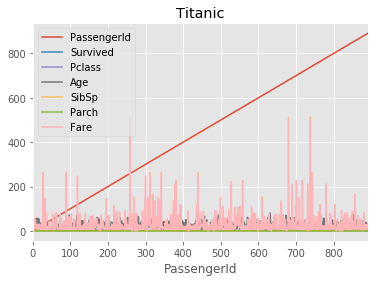

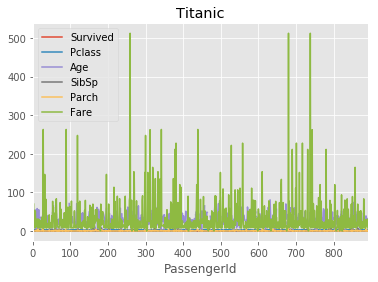

In [99]:
train.plot(x = train["PassengerId"], title = "Titanic")
train.iloc[:, 1:].plot(x = train["PassengerId"], title = "Titanic")
plt.show()

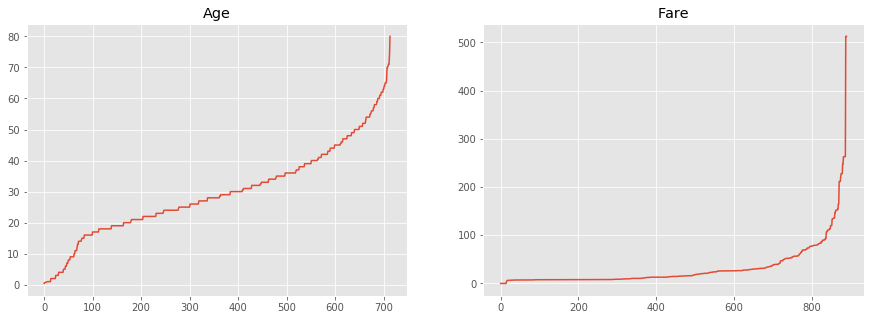

In [113]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Age")
plt.plot(np.sort(train.Age))
plt.subplot(1, 2, 2)
plt.title("Fare")
plt.plot(np.sort(train.Fare))
plt.show()

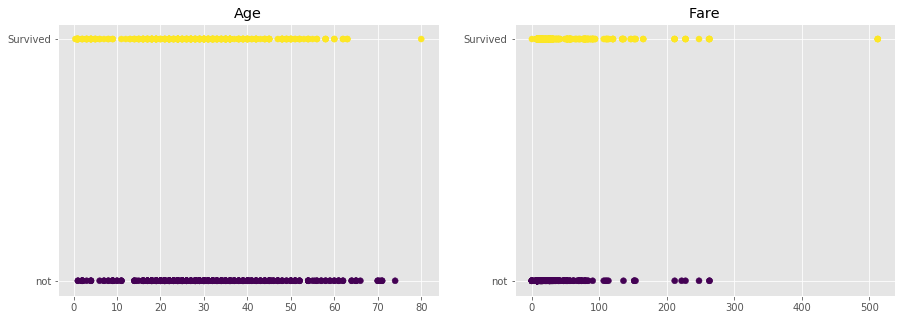

In [137]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Age")
plt.yticks(range(2), ('not', 'Survived'))
plt.scatter(train.Age, train.Survived, c=train.Survived)
plt.subplot(1, 2, 2)
plt.title("Fare")
plt.yticks(range(2), ('not', 'Survived'))
plt.scatter(train.Fare, train.Survived, c=train.Survived)
plt.show()

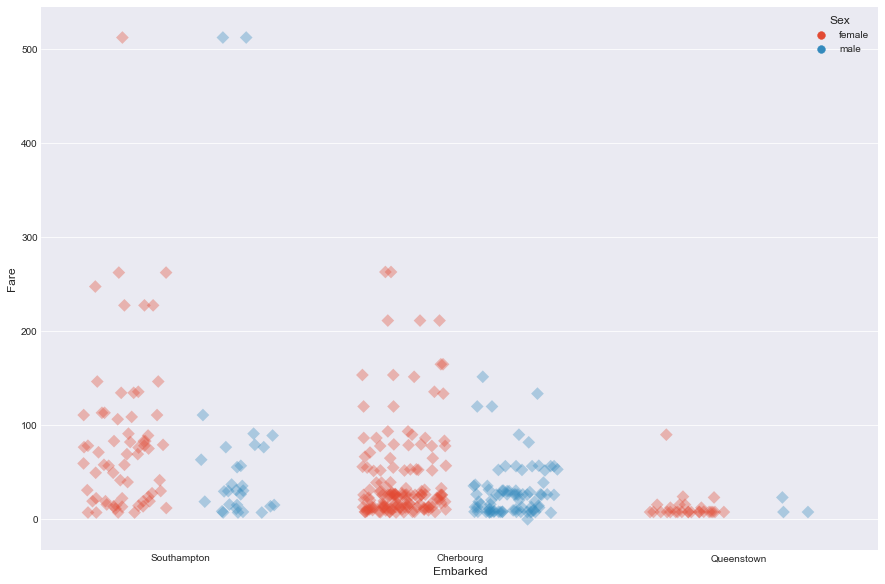

In [319]:
# hue정리 문제
plt.figure(figsize=(15, 10))
g1 = sns.stripplot(data = train[train["Survived"]==1], x = "Embarked", y = "Fare", 
                   jitter=0.3, hue="Sex", dodge=True, alpha=0.35, marker="D", size = 9)
#g2 = sns.stripplot(data = train[train["Survived"]==0], x = "Embarked", y = "Fare", 
#                   jitter=0.3, hue="Sex", dodge=True, alpha=0.35, marker="X", size = 9)

g1.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"])
plt.show()

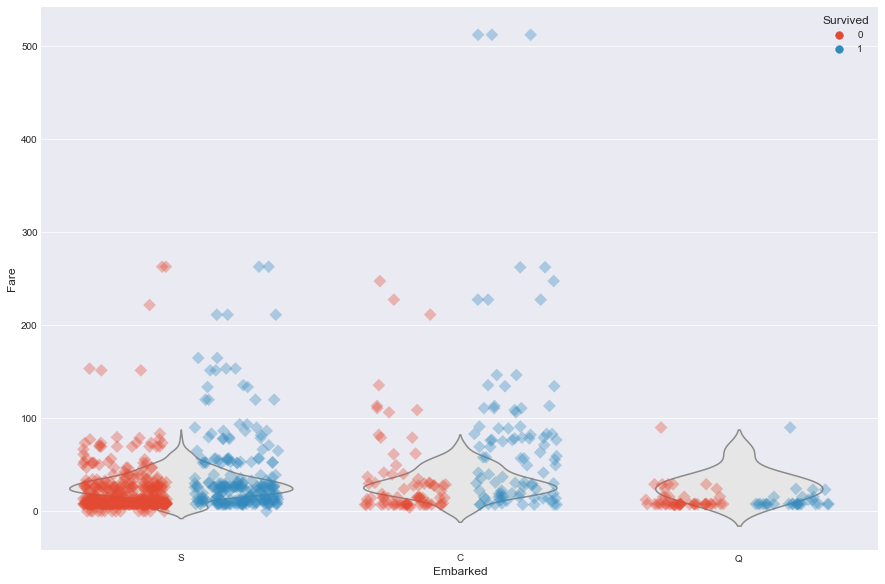

In [223]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=train, x="Embarked", y="Age", inner=None, color=".9")
sns.stripplot(data=train, x="Embarked", y="Fare", 
              jitter=0.3, hue="Survived", dodge=True, alpha=0.35, marker="D", size=9)
plt.show()

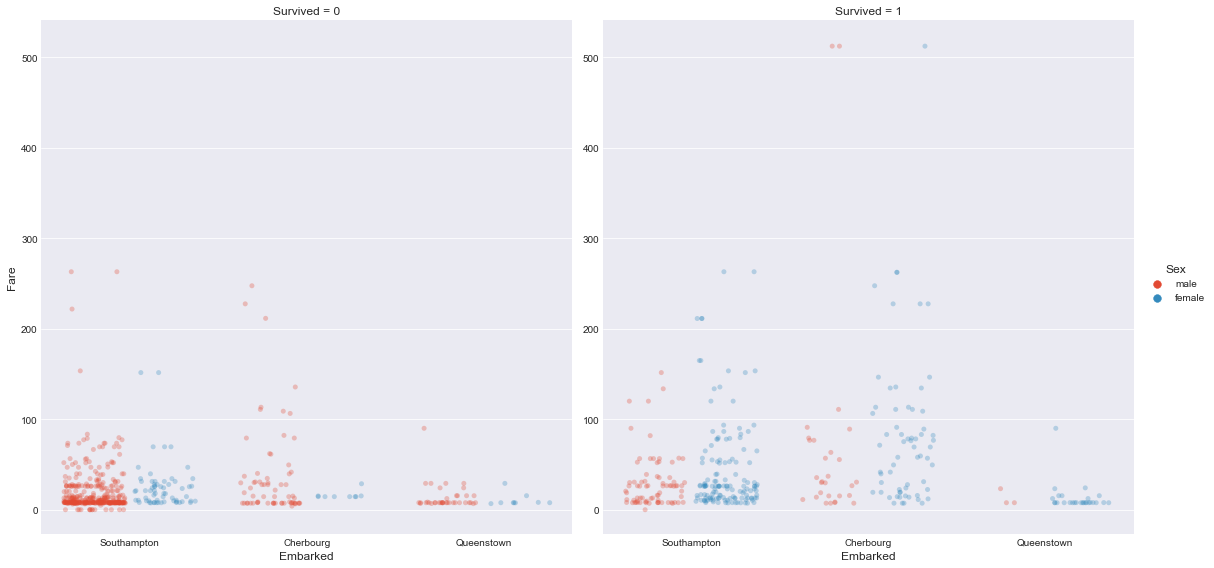

In [197]:
#sns.violinplot(data=train, x="Embarked", y="Age")
g = sns.factorplot(data=train, x="Embarked", y="Fare", hue="Sex", col="Survived", kind="strip", 
                   dodge=True, jitter=0.35, size=8, aspect=1, ci=None, marker="o", alpha=0.3)
g.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"])

plt.show()

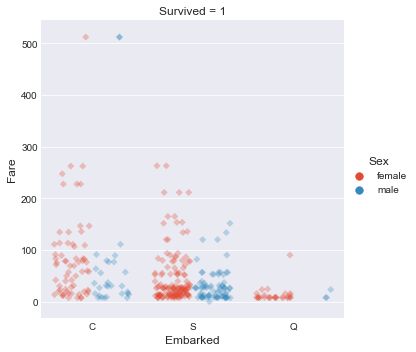

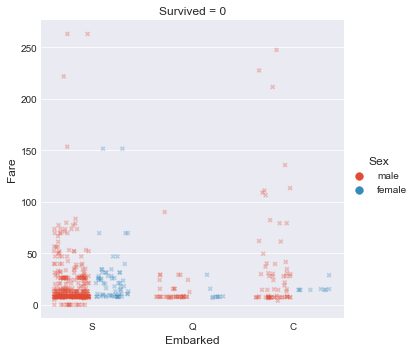

In [198]:
ax1 = sns.factorplot(data=train[train["Survived"]==1], x="Embarked", y="Fare", hue="Sex", col="Survived", kind="strip", 
                   dodge=True, jitter=0.35, size=5, aspect=1, ci=None, marker="D", alpha=0.3)

ax2 = sns.factorplot(data=train[train["Survived"]==0], x="Embarked", y="Fare", hue="Sex", col="Survived", kind="strip", 
                   dodge=True, jitter=0.35, size=5, aspect=1, ci=None, marker="X", alpha=0.3)
plt.show()

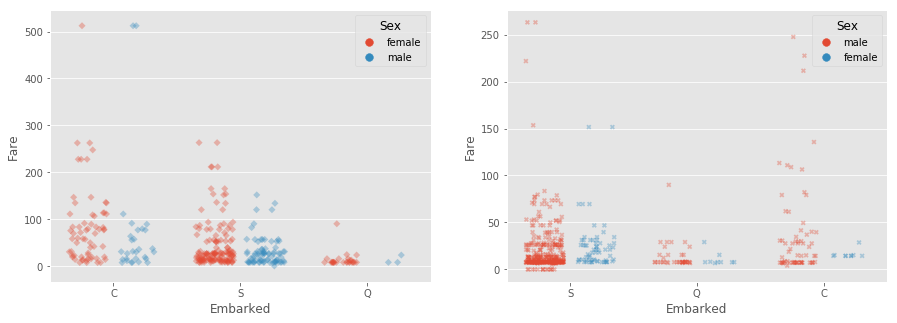

In [111]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.stripplot(data = train[train["Survived"]==1], x = "Embarked", y = "Fare", jitter=0.3, hue="Sex", dodge=True, alpha=0.35, marker="D")
plt.subplot(1, 2, 2)
sns.stripplot(data = train[train["Survived"]==0], x = "Embarked", y = "Fare", jitter=0.3, hue="Sex", dodge="a", alpha=0.35, marker="X")
plt.show()

In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
